### Importing Libraries

In [38]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import datetime as dt
import numpy as np
import hvplot.pandas
import panel as pn
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

### Importing Data from CSV Files

In [39]:
xlk_csv = pd.read_csv("../Project_1/xlk.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
xlf_csv = pd.read_csv("../Project_1/XLF.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
vnq_csv = pd.read_csv("../Project_1/VNQ.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
spy_csv = pd.read_csv("../Project_1/spy.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
ibb_csv = pd.read_csv("../Project_1/ibb.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
covid_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 
                         index_col="submission_date", parse_dates=True)

### Creating Dataframe for ETF Prices Pre-Covid

In [40]:
xlk_pre_covid = xlk_csv.reset_index()
xlk_pre_covid = xlk_pre_covid[0:767]
xlk_pre_covid.columns = ['Date', 'XLK']

xlf_pre_covid = xlf_csv.reset_index()
xlf_pre_covid = xlf_pre_covid[0:767]
xlf_pre_covid.columns = ['Date', 'XLF']
xlf_pre_covid = xlf_pre_covid.drop(columns=['Date'])

vnq_pre_covid = vnq_csv.reset_index()
vnq_pre_covid = vnq_pre_covid[0:767]
vnq_pre_covid.columns = ['Date', 'VNQ']
vnq_pre_covid = vnq_pre_covid.drop(columns=['Date'])

spy_pre_covid = spy_csv.reset_index()
spy_pre_covid = spy_pre_covid[0:767]
spy_pre_covid.columns = ['Date', 'SPY']
spy_pre_covid = spy_pre_covid.drop(columns=['Date'])

ibb_pre_covid = ibb_csv.reset_index()
ibb_pre_covid = ibb_pre_covid[0:767]
ibb_pre_covid.columns = ['Date', 'IBB']
ibb_pre_covid = ibb_pre_covid.drop(columns=['Date'])

pre_covid_concat = pd.concat([xlk_pre_covid, xlf_pre_covid, vnq_pre_covid,
                              spy_pre_covid, ibb_pre_covid], axis = "columns", join = "inner")
pre_covid_concat.set_index(["Date"], inplace = True)
pre_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2017-01-03,48.79,23.51,82.80,225.24,90.08
2017-01-04,48.96,23.70,84.01,226.58,92.41
2017-01-05,49.04,23.46,84.28,226.40,92.70
2017-01-06,49.40,23.54,84.29,227.21,93.42
2017-01-09,49.39,23.38,83.53,226.46,94.76


### Creating Dataframe for ETF Prices During Covid

In [41]:
xlk_post_covid = xlk_csv.reset_index()
xlk_post_covid = xlk_post_covid[767:]
xlk_post_covid.columns = ['Date', 'XLK']

xlf_post_covid = xlf_csv.reset_index()
xlf_post_covid = xlf_post_covid[767:]
xlf_post_covid.columns = ['Date', 'XLF']
xlf_post_covid = xlf_post_covid.drop(columns=['Date'])

vnq_post_covid = vnq_csv.reset_index()
vnq_post_covid = vnq_post_covid[767:]
vnq_post_covid.columns = ['Date', 'VNQ']
vnq_post_covid = vnq_post_covid.drop(columns=['Date'])

spy_post_covid = spy_csv.reset_index()
spy_post_covid = spy_post_covid[767:]
spy_post_covid.columns = ['Date', 'SPY']
spy_post_covid = spy_post_covid.drop(columns=['Date'])

ibb_post_covid = ibb_csv.reset_index()
ibb_post_covid = ibb_post_covid[767:]
ibb_post_covid.columns = ['Date', 'IBB']
ibb_post_covid = ibb_post_covid.drop(columns=['Date'])

during_covid_concat = pd.concat([xlk_post_covid, xlf_post_covid, vnq_post_covid,
                              spy_post_covid, ibb_post_covid], axis = "columns", join = "inner")
during_covid_concat.set_index(["Date"], inplace = True)
during_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2020-01-22,97.43,30.86,94.98,331.34,120.55
2020-01-23,97.89,30.78,95.78,331.72,119.50
2020-01-24,97.43,30.39,95.45,328.77,116.88
2020-01-27,95.11,29.92,94.99,323.50,116.09
2020-01-28,96.93,30.27,95.37,326.89,117.32


### Creating Covid Cases Dataframe

In [42]:
covid_clean_data = covid_data[["tot_cases","tot_death"]]
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean.reset_index(inplace = True)
covid_really_clean.columns = ['Date', 'tot_cases', 'tot_death']
covid_really_clean.set_index('Date', inplace=True)
covid_really_clean.head()

,tot_cases,tot_death
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


In [43]:
covid_really_clean.to_csv("really_clean.csv")

### Concatinating Covid Dataframe with ETF Prices

In [44]:
covid_data_impact = pd.concat([covid_really_clean, during_covid_concat], axis = 'columns',
                              join = 'inner'
                             )
covid_data_impact.head()

,tot_cases,tot_death,XLK,XLF,VNQ,SPY,IBB
Date,,,,,,,
2020-01-22,1,0,97.43,30.86,94.98,331.34,120.55
2020-01-23,1,0,97.89,30.78,95.78,331.72,119.50
2020-01-24,2,0,97.43,30.39,95.45,328.77,116.88
2020-01-27,5,0,95.11,29.92,94.99,323.50,116.09
2020-01-28,5,0,96.93,30.27,95.37,326.89,117.32


In [45]:
covid_data.to_csv("final_merge_data_covid.csv")

## Statistical analysis of ETF's Pre-Covid

#### Percentage Change

In [46]:
during_covid_pct_change = during_covid_concat.pct_change().dropna()
during_covid_pct_change.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2020-01-23,0.004721,-0.002592,0.008423,0.001147,-0.008710
2020-01-24,-0.004699,-0.012671,-0.003445,-0.008893,-0.021925
2020-01-27,-0.023812,-0.015466,-0.004819,-0.016029,-0.006759
2020-01-28,0.019136,0.011698,0.004000,0.010479,0.010595
2020-01-29,0.002579,-0.001652,-0.003670,-0.000826,-0.000682


In [47]:
portfolio_unchanged = during_covid_pct_change.drop(columns=['SPY'])
portfolio_unchanged.head()

,XLK,XLF,VNQ,IBB
Date,,,,
2020-01-23,0.004721,-0.002592,0.008423,-0.008710
2020-01-24,-0.004699,-0.012671,-0.003445,-0.021925
2020-01-27,-0.023812,-0.015466,-0.004819,-0.006759
2020-01-28,0.019136,0.011698,0.004000,0.010595
2020-01-29,0.002579,-0.001652,-0.003670,-0.000682


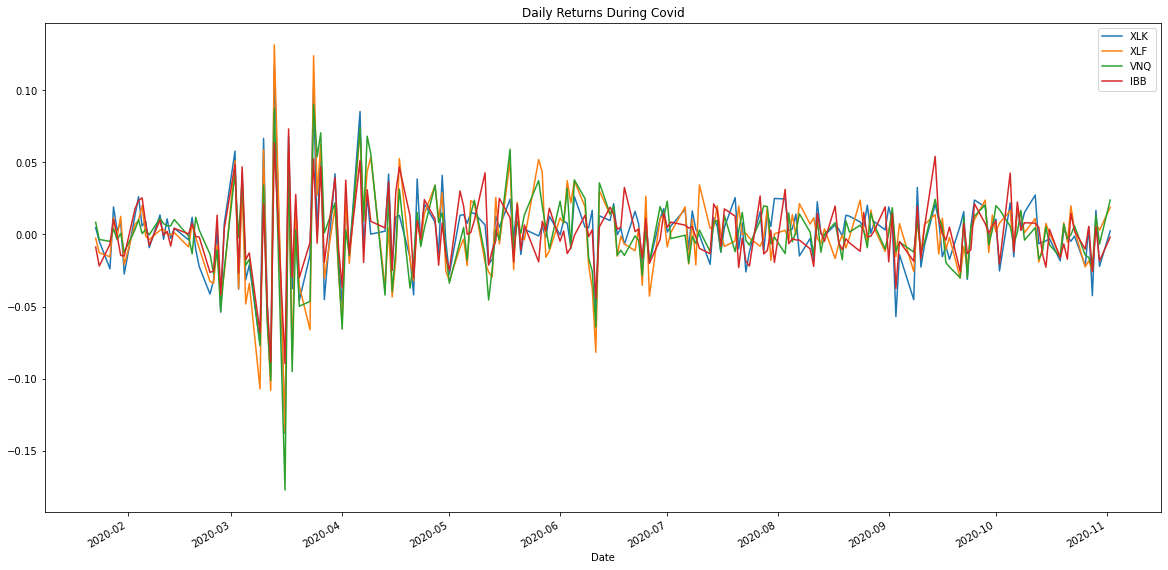

In [48]:
portfolio_unchanged.plot(figsize = (20,10),title = "Daily Returns During Covid")

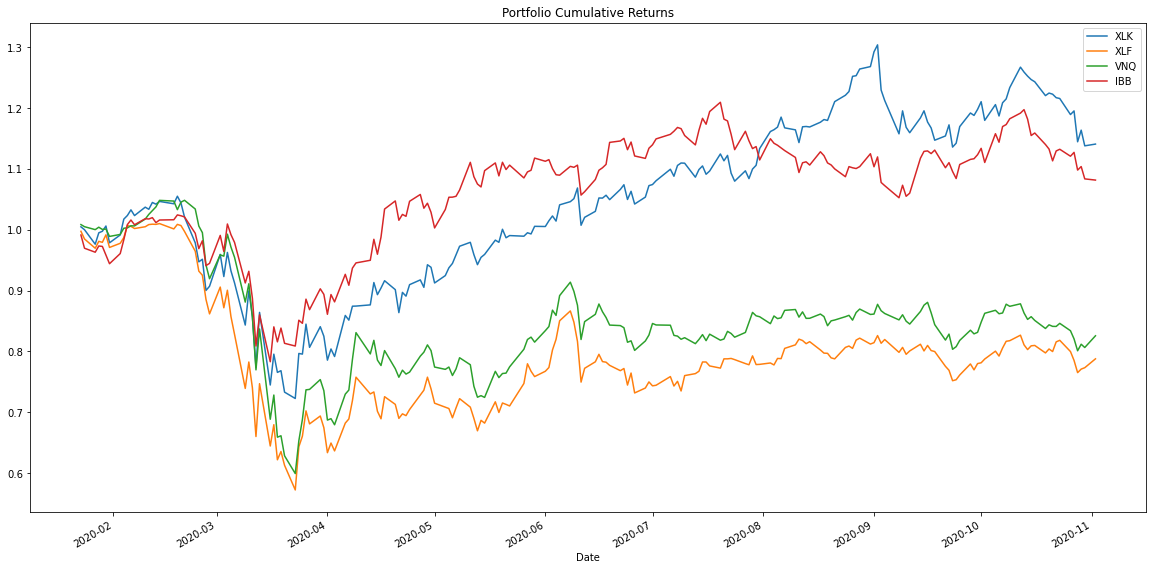

In [97]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + portfolio_unchanged).cumprod()
cumulative_returns.plot(figsize=(20,10), title = "Portfolio Cumulative Returns")

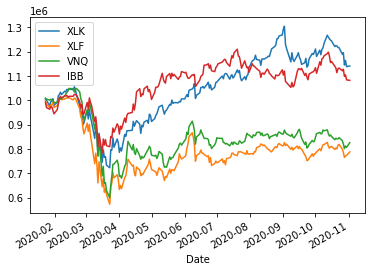

In [96]:
# Plot the returns of the portfolio in terms of money
initial_investment = 1000000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

In [51]:
Port_volatility = during_covid_concat.std() * np.sqrt(252)
Port_volatility.sort_values(inplace=True)
Port_volatility 

XLF     45.385399
VNQ    130.842523
IBB    178.983438
XLK    208.168376
SPY    460.646805
dtype: float64

In [52]:
# Use the `corr` function to calculate the correlation between stock returns
correlation_port1 = during_covid_pct_change.corr()
correlation_port1

,XLK,XLF,VNQ,SPY,IBB
XLK,1.000000,0.806203,0.790338,0.959175,0.838179
XLF,0.806203,1.000000,0.900383,0.916846,0.687560
VNQ,0.790338,0.900383,1.000000,0.894444,0.685508
SPY,0.959175,0.916846,0.894444,1.000000,0.832919
IBB,0.838179,0.687560,0.685508,0.832919,1.000000


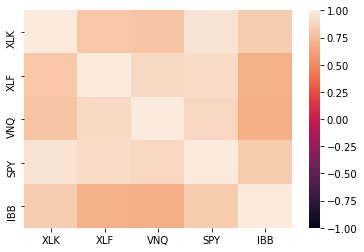

In [53]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation_port1, vmin=-1, vmax=1)

In [54]:
# Alternatively, sum total correlation for each stock
correlation_port1.sum(axis=0).sort_values()

IBB    4.044165
VNQ    4.270672
XLF    4.310992
XLK    4.393894
SPY    4.603383
dtype: float64

In [55]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = during_covid_pct_change.drop(columns=['VNQ', 'XLF'])
noncorrelated_daily_returns.head()

,XLK,SPY,IBB
Date,,,
2020-01-23,0.004721,0.001147,-0.008710
2020-01-24,-0.004699,-0.008893,-0.021925
2020-01-27,-0.023812,-0.016029,-0.006759
2020-01-28,0.019136,0.010479,0.010595
2020-01-29,0.002579,-0.000826,-0.000682


In [56]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

XLK    0.599600
SPY    0.175770
IBB    0.456616
dtype: float64

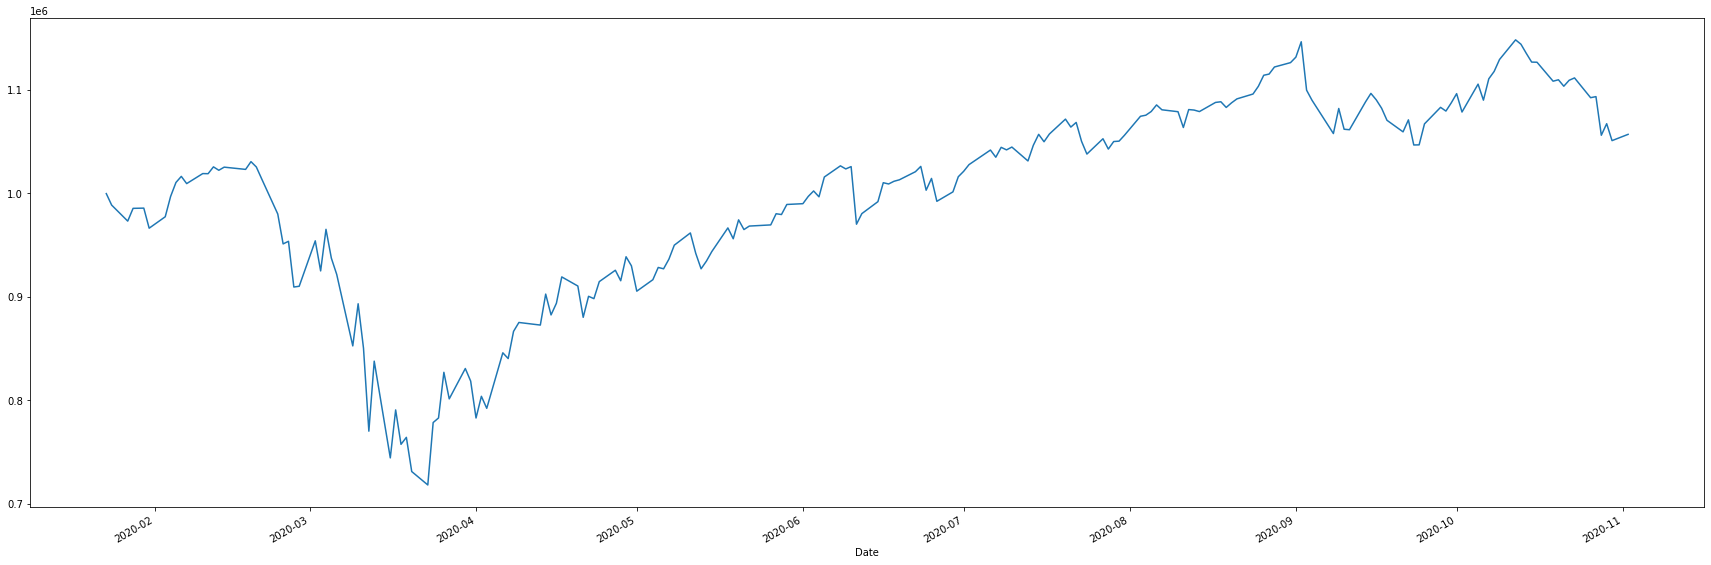

In [57]:
#we. are going neutral financial and real state reeplacin then with SPY to keep  some exposure to that sectors 
#and overweight tech and biotech
initial_investment = 1000000
weights = [.25,.5,.25]
active_portfolio_returns = noncorrelated_daily_returns.dot(weights)
active_cumulative_returns = (1 + active_portfolio_returns).cumprod()
active_cumulative_profits = (initial_investment * active_cumulative_returns)
active_cumulative_profits.plot(figsize=(30,10))

In [58]:
port_passive = portfolio_unchanged

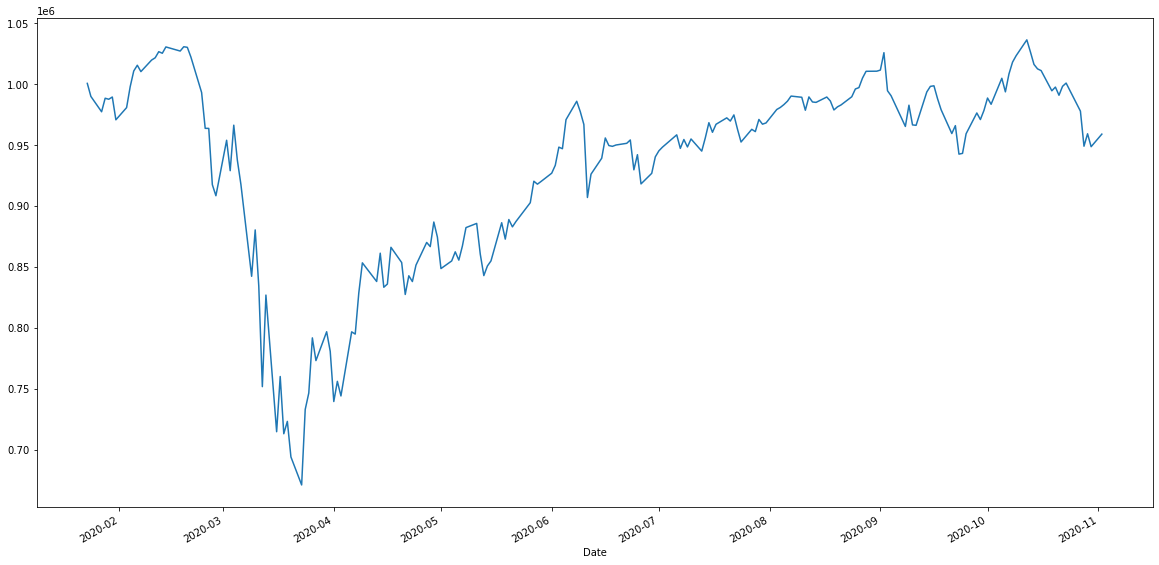

In [59]:
initial_investment = 1000000
weights = [0.25, 0.25, 0.25, 0.25]
passive_portfolio_returns = port_passive.dot(weights)
passive_cumulative_returns = (1 + passive_portfolio_returns).cumprod()
passive_cumulative_profits = (initial_investment * passive_cumulative_returns)
passive_cumulative_profits.plot(figsize=(20,10))

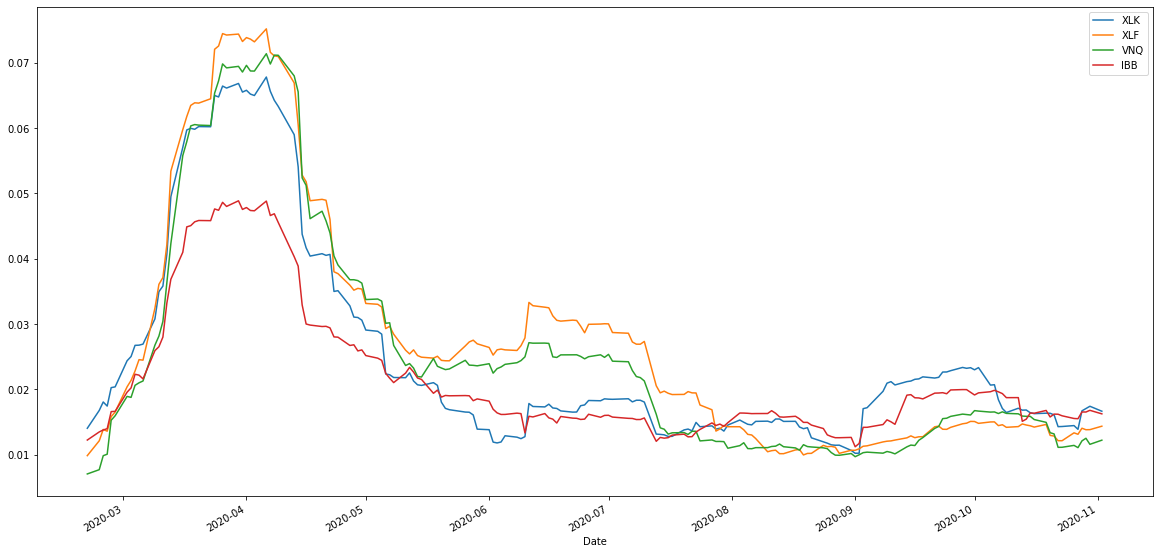

In [61]:
# Calculate and plot the rolling standard deviation for using a 21 trading day window

portfolio_unchanged.rolling(window=21).std().plot(figsize=(20,10))

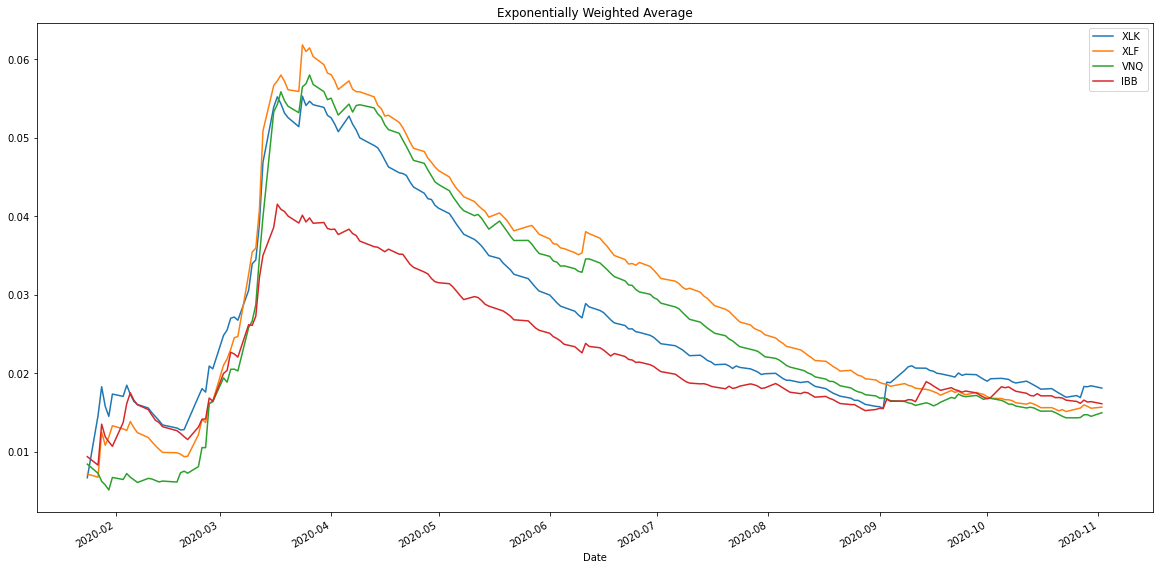

In [62]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_beta = portfolio_unchanged.ewm(halflife=21).std()
rolling_beta.plot(figsize = (20, 10), title = "Exponentially Weighted Average")

In [63]:
during_covid_std = during_covid_concat.std()
during_covid_std

XLK    13.113375
XLF     2.859011
VNQ     8.242304
SPY    29.018021
IBB    11.274897
dtype: float64

In [64]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.35, 0.05, 0.05, 0.35, 0.20]

portfolio_returns_modified = during_covid_pct_change.dot(weights)

portfolio_returns_modified.head()

Date
2020-01-23    0.000603
2020-01-24   -0.009948
2020-01-27   -0.016311
2020-01-28    0.013269
2020-01-29    0.000211
dtype: float64

In [65]:
portfolio_returns_modified.hvplot(x = 'Date')

:Curve   [Date]   (0)

In [66]:
final_data_df = pd.concat([during_covid_pct_change, covid_really_clean], axis = 1, join = "inner")

In [67]:
final_data_df.head()

,XLK,XLF,VNQ,SPY,IBB,tot_cases,tot_death
Date,,,,,,,
2020-01-23,0.004721,-0.002592,0.008423,0.001147,-0.008710,1,0
2020-01-24,-0.004699,-0.012671,-0.003445,-0.008893,-0.021925,2,0
2020-01-27,-0.023812,-0.015466,-0.004819,-0.016029,-0.006759,5,0
2020-01-28,0.019136,0.011698,0.004000,0.010479,0.010595,5,0
2020-01-29,0.002579,-0.001652,-0.003670,-0.000826,-0.000682,5,0


In [68]:
final_data_df.hvplot(x = 'Date', y = ['XLK', 'XLF', 'VNQ', 'SPY', 'IBB', 'tot_death'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

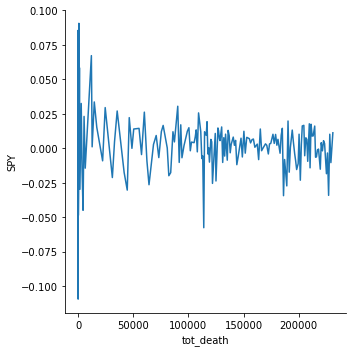

In [69]:
#final_data_df['XLK', 'XLF', 'VNQ', 'SPY', 'IBB'].hvplot.kde('final_data_df', by = 'tot_death', alpha=0.5)
sns.relplot(x="tot_death", y = "SPY", kind ="line", estimator=None, data=final_data_df)

In [70]:
final_data_df.to_csv("final_data_graph.csv")

#### Standard Deviation

In [71]:
pre_covid_std = pre_covid_concat.std()
pre_covid_std.head()

XLK    10.516747
XLF     1.948106
VNQ     5.168474
SPY    23.704108
IBB     7.084195
dtype: float64

### Sharpe Ratios Barplot

## Statistical analysis of ETF's During Covid

#### Percentage Change

In [72]:
pct_change_covid = covid_data_impact.pct_change().dropna()
pct_change_covid.head()

,tot_cases,tot_death,XLK,XLF,VNQ,SPY,IBB
Date,,,,,,,
2020-03-02,2.312500,inf,0.057825,0.051147,0.042712,0.043307,0.048648
2020-03-03,0.471698,0.500000,-0.037976,-0.037567,-0.002306,-0.028632,-0.026712
2020-03-04,0.256410,0.111111,0.042922,0.033086,0.037755,0.042033,0.046890
2020-03-05,0.673469,0.100000,-0.031560,-0.048219,-0.021426,-0.033242,-0.017423
2020-03-06,0.286585,0.090909,-0.021138,-0.034026,-0.017234,-0.016531,-0.012797


#### Covariance and Variance of All ETF's Relative to SNP500

In [73]:
during_covid_xlk_cov = during_covid_concat['XLK'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_xlf_cov = during_covid_concat['XLF'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_vnq_cov = during_covid_concat['VNQ'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_ibb_cov = during_covid_concat['IBB'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_var = during_covid_concat['SPY'].rolling(window = 2).var().dropna()
during_covid_var.head()

Date
2020-01-23     0.07220
2020-01-24     4.35125
2020-01-27    13.88645
2020-01-28     5.74605
2020-01-29     0.03645
Name: SPY, dtype: float64

#### Beta Values for All ETF's

In [74]:
xlk_beta_covid = during_covid_xlk_cov/during_covid_var
xlf_beta_covid = during_covid_xlf_cov/during_covid_var
vnq_beta_covid = during_covid_vnq_cov/during_covid_var
ibb_beta_covid = during_covid_ibb_cov/during_covid_var
pct_change_covid = covid_really_clean.pct_change()
beta_during_covid = pd.concat([xlk_beta_covid, xlf_beta_covid, vnq_beta_covid, ibb_beta_covid],
                             axis = 'columns', join = 'inner')
beta_during_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_during_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2020-01-23,1.210526,-0.210526,2.105263,-2.763158
2020-01-24,0.155932,0.132203,0.111864,0.888136
2020-01-27,0.440228,0.089184,0.087287,0.149905
2020-01-28,0.536873,0.103245,0.112094,0.362832
2020-01-29,-0.925926,0.185185,1.296296,0.296296


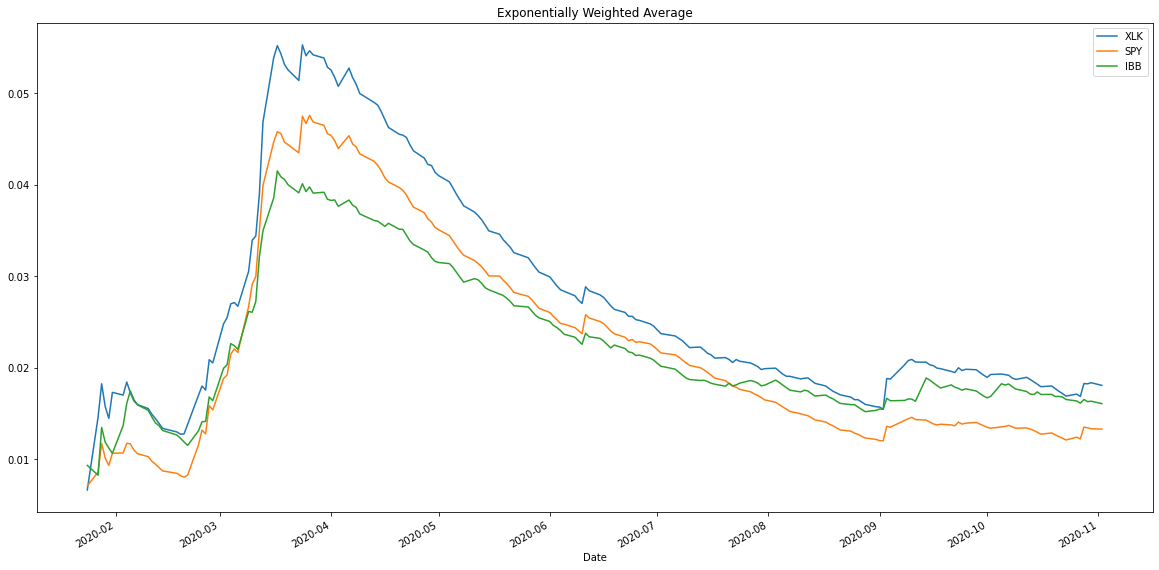

In [75]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_beta = noncorrelated_daily_returns.ewm(halflife=21).std()
rolling_beta.plot(figsize = (20, 10), title = "Exponentially Weighted Average")

#### Sharpe Ratios and Volatility 

In [76]:
daily_returns_covid = during_covid_concat.pct_change().dropna()
std_during_covid = during_covid_concat.std()
during_volatility = std_during_covid*np.sqrt(252)
correlation_covid = during_covid_concat.corr()
correlation_covid_sum = correlation_covid.sum(axis=0).sort_values()
sharpe_ratios_covid = (daily_returns_covid.mean()*252) / (daily_returns_covid.std() * np.sqrt(252))
sharpe_ratios_covid.sort_values(ascending = False, inplace = True)

## Graphical Representations Pre Covid

### Beta-Plot

In [87]:
final_data_df[100:]

,XLK,XLF,VNQ,SPY,IBB,tot_cases,tot_death
Date,,,,,,,
2020-06-16,0.021321,0.015728,0.019689,0.019248,0.014023,2132738,116878
2020-06-17,-0.000195,-0.015077,-0.014512,-0.004154,0.003703,2155572,117632
2020-06-18,0.004488,-0.001241,-0.010953,0.000385,0.005044,2183400,118365
2020-06-19,-0.006897,-0.006628,-0.014520,-0.010071,0.032662,2215618,119055
2020-06-22,0.016041,-0.011259,-0.000999,0.006415,0.002031,2302302,120333
...,...,...,...,...,...,...,...
2020-10-27,0.005006,-0.018233,-0.016033,-0.003447,0.005625,8752794,225985
2020-10-28,-0.042422,-0.025588,-0.023865,-0.034179,-0.025834,8834393,227045
2020-10-29,0.016680,0.007624,0.013407,0.010163,0.005289,8924548,228100


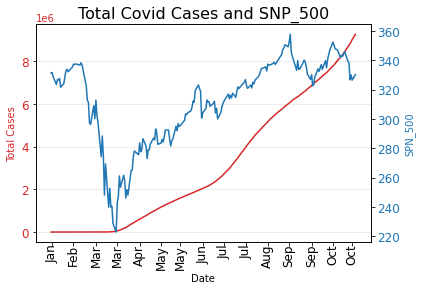

In [99]:

t = covid_data_impact.index
data1 = covid_data_impact["tot_cases"]
data2 =covid_data_impact["SPY"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.set_ylabel('Total Cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('SPN_500', color=color)  
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
xtick_location = final_data_df.index.tolist()[::14]
xtick_labels = final_data_df.index.tolist()[::14]
ax1.set_xticks(xtick_location)
ax1.set_xticklabels(xtick_labels, rotation = 90, fontdict={'horizontalalignment': 'center', 
                                                          'verticalalignment': 'center_baseline'});
ax1.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax1.tick_params(axis = 'y', labelsize = 12)
ax2.tick_params(axis = 'y', labelsize = 12)
ax1.set_title("Total Covid Cases and SNP_500", fontsize = 16)
ax1.grid(axis = "y", alpha = .3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [94]:
final_data_df.hvplot.scatter(x="Date",y="SPY", c="tot_death")

:Scatter   [Date]   (SPY,tot_death)